<a href="https://colab.research.google.com/github/Praveen3ravi/Learning_Natural_Language_Processing/blob/main/3Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3ANALYTICS TASK**

In [711]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [712]:
# Reading the data
url='https://raw.githubusercontent.com/Praveen3ravi/Learning_Natural_Language_Processing/main/Patient_details.csv'

In [713]:
# Since i couldn't able to open the data i have used the encoding.
df=pd.read_csv(url,encoding=("ISO-8859-1"))
pd.set_option('display.max_colwidth',200)
df.head()

TEXT
0                                                                                                          Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
1  Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for pa...
2  About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. ...
3                                                                                                                                     extreme fatigue, dizziness,. could not lift my left arm for 72 hours
4                                                                                                                                            Injection site swelling, redness, warm to the touch and itchy

In [714]:
# Chenging the feature to unicode.
doc=df['TEXT'].values.astype("U")
df['ID']=list(range(499))
df=df[['ID','TEXT']]

In [715]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import re

#**DATA PREPROCESSING**

##**REMOVING PUNCTUATIONS & LOWER CASED**
Usually in NLP tasks we use to remove punctuation from the corpus. This is valid when we are dealing with large corpora and we want to do some specific tasks like document similarity, classification, clustering etc.

In [716]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [717]:
def remove_punc(text):
  no_punct = "".join([char.lower() for char in text if char not in string.punctuation])
  return no_punct

In [718]:
df['Removed_Punct']=df['TEXT'].apply(lambda x: remove_punc(x))
df.head()

ID  ...                                                                                                                                                                                            Removed_Punct
0   0  ...                                                                                                          right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken
1   1  ...  approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patien...
2   2  ...  about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we g...
3   3  ...                                                                                                                                        extreme fatigue dizziness could not lift my left arm for 72 hours
4   4  ...                                                                                                                                              injection site swelling redness warm to the touch and itchy

[5 rows x 3 columns]

##**TOKENIZATION**
Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. 

In [719]:
from nltk.tokenize import word_tokenize
import re

In [720]:
def token(text):
  tokenise = re.split('\W+',text)
  return tokenise

In [721]:
# tokens=re.split('\W+',df['text'])
df['tokenized']=df['Removed_Punct'].apply(lambda x: token(x))

In [722]:
df.head()

ID  ...                                                                                                                                                                                                tokenized
0   0  ...                                                                                           [right, side, of, epiglottis, swelled, up, and, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]
1   1  ...  [approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, and, anxiousness, assessed, at, time, of, event, heart, sounds, normal, lung, sounds, clear, vitals, within,...
2   2  ...  [about, 15, minutes, after, receiving, the, vaccine, the, patient, complained, about, her, left, arm, hurting, she, also, complained, of, chest, tightness, and, difficulty, swallowing, patient, al...
3   3  ...                                                                                                                           [extreme, fatigue, dizziness, could, not, lift, my, left, arm, for, 72, hours]
4   4  ...                                                                                                                                   [injection, site, swelling, redness, warm, to, the, touch, and, itchy]

[5 rows x 4 columns]

##**REMOVING STOPWORDS**
Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

In [723]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [724]:
stopword=nltk.corpus.stopwords.words('english')

In [725]:
stopword[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [726]:
def remove_sw(text):
  sw=[i for i in text if i not in stopword]
  return sw

In [727]:
df['Removed_SW']=df['tokenized'].apply(lambda x: remove_sw(x))
df.head()

ID  ...                                                                                                                                                                                               Removed_SW
0   0  ...                                                                                                        [right, side, epiglottis, swelled, hinder, swallowing, pictures, taken, benadryl, tylenol, taken]
1   1  ...  [approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sounds, normal, lung, sounds, clear, vitals, within, normal, limi...
2   2  ...  [15, minutes, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, changes, gave, patient, 1, tablet, ben...
3   3  ...                                                                                                                                         [extreme, fatigue, dizziness, could, lift, left, arm, 72, hours]
4   4  ...                                                                                                                                                 [injection, site, swelling, redness, warm, touch, itchy]

[5 rows x 5 columns]

##**PART OF SPEECH TAGGING** & **LEMMATIZATION**
*  Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.
*  Lemmatization is one of the most common text pre-processing techniques used in Natural Language Processing (NLP) and machine learning in general. The root word is called a stem in the stemming process, and it is called a lemma in the lemmatization process.

In [728]:
nltk.download('tagsets')
nltk.help.upenn_tagset("MD")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [729]:
def remove_punc2(text):
  no_punct = " ".join([char.lower() for char in text if char not in string.punctuation])
  return no_punct

df['POS']=df['Removed_SW'].apply(lambda x: remove_punc2(x))
df.head(2)  

ID  ...                                                                                                                                                                                                      POS
0   0  ...                                                                                                                    right side epiglottis swelled hinder swallowing pictures taken benadryl tylenol taken
1   1  ...  approximately 30 min post vaccination administration patient demonstrated sob anxiousness assessed time event heart sounds normal lung sounds clear vitals within normal limits patient o2 91 3 lite...

[2 rows x 6 columns]

In [730]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag -> wordnet tag -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Processed'] = df['POS'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [731]:
df.head(2)

ID  ...                                                                                                                                                                                                Processed
0   0  ...                                                                                                                         right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1   1  ...  approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...

[2 rows x 7 columns]

In [732]:
df['Id']=list(range(499))
df=df[['Id','Processed']]
df = pd.DataFrame(df)
df.head()

Id                                                                                                                                                                                                Processed
0   0                                                                                                                         right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1   1  approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...
2   2  15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...
3   3                                                                                                                                                   extreme fatigue dizziness could lift leave arm 72 hour
4   4                                                                                                                                                            injection site swell redness warm touch itchy

In [733]:
# df=df[['TEXT','Lemma']]
df_new=df.copy(deep=True)
# df = pd.DataFrame(df)

In [734]:
stopword=nltk.corpus.stopwords.words('english')
from  nltk.stem import PorterStemmer
ps=PorterStemmer()
def clean_data(text):
  txt=" ".join([c for c in text if c not in string.punctuation])
  tokens=re.split('\W+',txt)
  txt=[ps.stem(i) for i in tokens if i not in stopword]
  return txt

In [735]:
# df['Stemmer']=df['Lemma'].apply(lambda x: clean_data(x))
# df.head()

##**MOST FREQUENT WORD**
A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document. Formally, a frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome.

Frequency distributions are generally constructed by running a number of experiments, and incrementing the count for a sample every time it is an outcome of an experiment.

In [736]:
df.head()

Id                                                                                                                                                                                                Processed
0   0                                                                                                                         right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1   1  approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...
2   2  15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...
3   3                                                                                                                                                   extreme fatigue dizziness could lift leave arm 72 hour
4   4                                                                                                                                                            injection site swell redness warm touch itchy

In [737]:
from nltk.probability import FreqDist
from nltk.corpus import webtext
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [738]:
freqD=list([nltk.FreqDist(i) for i in df['Processed']])
# freqD = FreqDist(df['lemma'])
len(freqD)

499

In [739]:
from collections import Counter

In [740]:
# def remove_punc2(text):
#   no_punct = "".join([char.lower() for char in text if char not in string.punctuation])
#   return no_punct

# df['Freq']=df['Processed'].apply(lambda x: remove_punc2(x))
# df.head()  

In [741]:
cnt=Counter()
for text in df['Processed'].values:
  for i in text.split():
    cnt[i]+=1 
l=len(cnt)    
mfw = cnt.most_common(l)    
mfw = pd.DataFrame(mfw[::],columns=['Word','Count'])   
mfw.T

0          1     2     3         4     ... 2342  2343 2344     2345      2346
Word   day  injection  pain  hour  headache  ...  mom  1600   on  120140s  vigorous
Count  256        224   204   202       192  ...    1     1    1        1         1

[2 rows x 2347 columns]

In [742]:
mfw.dtypes

Word     object
Count     int64
dtype: object

In [743]:
most_frequent_word = mfw[:51]
least_frequent_word = mfw[::-1]
# least_frequent_word[:51]
# most_frequent_word

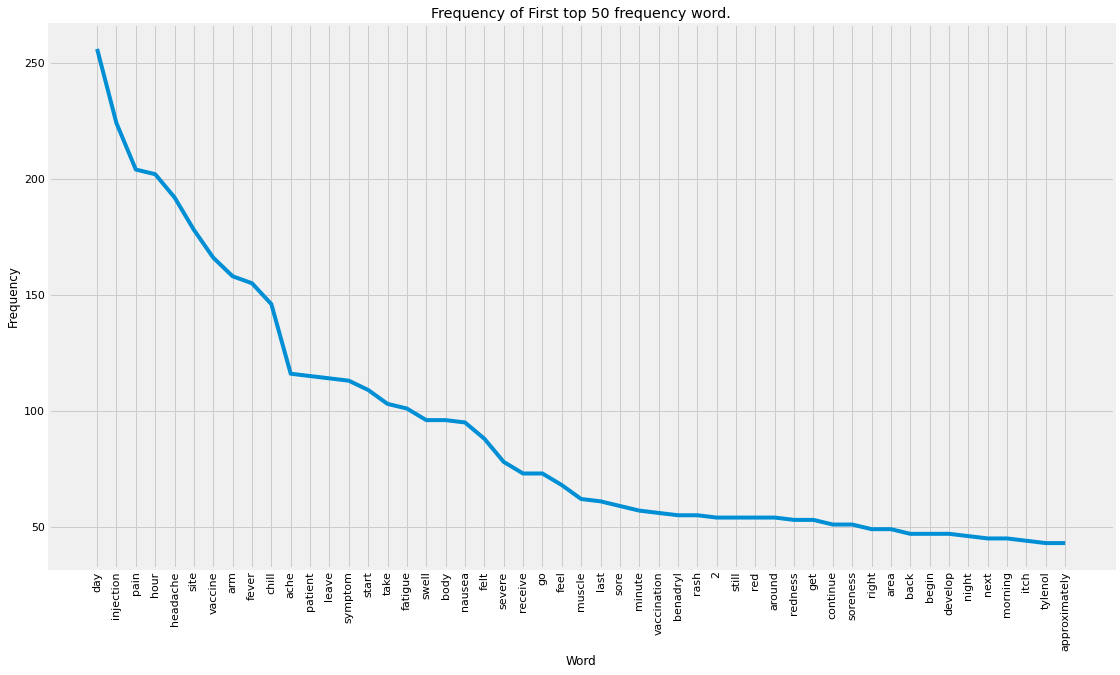

In [744]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))
plt.plot(most_frequent_word['Word'],most_frequent_word['Count'])
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.title('Frequency of First top 50 frequency word.')
plt.xticks(rotation=90)
plt.show() 

##**WORD CLOUD**
A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

In [745]:
df.head(1)

Id                                                                         Processed
0   0  right side epiglottis swell hinder swallowing picture take benadryl tylenol take

In [746]:
from wordcloud import WordCloud
cloud=WordCloud()

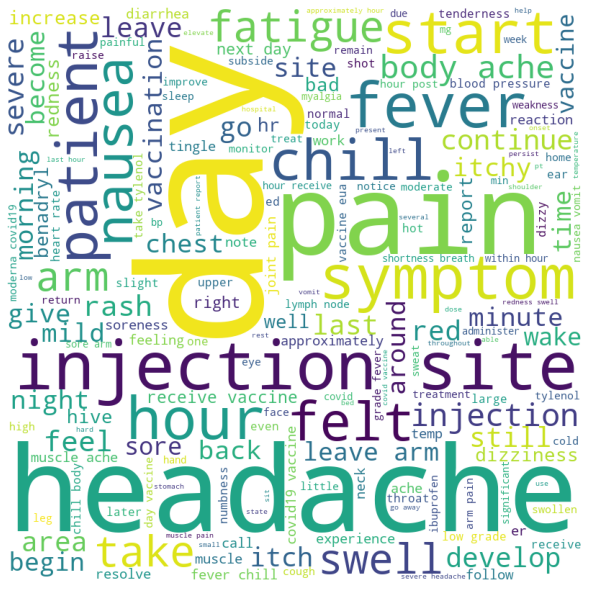

In [747]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##**TEXT VECTORIZATION**
Processing natural language text and extract useful information from the given word, a sentence using machine learning and deep learning techniques requires the string/text needs to be converted into a set of real numbers (a vector) — Word Embeddings.
Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.

###**COUNT_VECTORIZATION - Document matric:**
CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [748]:
df.head(1)

Id                                                                         Processed
0   0  right side epiglottis swell hinder swallowing picture take benadryl tylenol take

In [749]:
df_Count_Vect = df.copy()
df_TFIDF_Vect = df.copy()
df_Count_Vect.head()

Id                                                                                                                                                                                                Processed
0   0                                                                                                                         right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1   1  approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...
2   2  15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...
3   3                                                                                                                                                   extreme fatigue dizziness could lift leave arm 72 hour
4   4                                                                                                                                                            injection site swell redness warm touch itchy

In [750]:
from sklearn.feature_extraction.text import CountVectorizer 

In [751]:
cv=CountVectorizer(analyzer=clean_data)

In [752]:
X=cv.fit_transform(df_Count_Vect['Processed'])

In [753]:
print(X.shape)

(499, 28)


In [754]:
Feature_names = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [755]:
cv_df = pd.DataFrame(X.toarray())

In [756]:
cv_df.head()

0   1   2   3   4   5   6   7   8   ...  19  20  21  22  23  24  25  26  27
0   0   0   0   0   0   0   0   0   0  ...   4   2   0   4   1   0   3   0   0
1   1   2   2   2   0   1   0   0   0  ...  29  10   0  14  13   4   2   4   1
2   0   2   1   0   0   2   0   0   0  ...  15   7   0   8   3   8   3   0   0
3   0   0   1   0   0   0   0   1   0  ...   1   0   0   3   3   1   0   1   2
4   0   0   0   0   0   0   0   0   0  ...   3   0   0   2   1   0   2   0   0

[5 rows x 28 columns]

###**TF-IDF VECTORIZER - Term Frequency — Inverse Document Frequency**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

$W_{i,j}=tf_{(i,j)} * log ({N}/{df_i})$

* $tf_{(i,j)}$ - No of time term i occurs in j divided by total number of terms in j.

* $log ({N}/{})$ - Here N is - Total number of documnets.
* $log (/{df_i})$ - Here $df_i$ Number of documnets containing i.

In [757]:
df_TFIDF_Vect.head()

Id                                                                                                                                                                                                Processed
0   0                                                                                                                         right side epiglottis swell hinder swallowing picture take benadryl tylenol take
1   1  approximately 30 min post vaccination administration patient demonstrate sob anxiousness assess time event heart sound normal lung sound clear vitals within normal limit patient o2 91 3 liter nc c...
2   2  15 minute receive vaccine patient complain left arm hurting also complain chest tightness difficulty swallow patient also vision change give patient 1 tablet benadryl 25 mg call em service ems che...
3   3                                                                                                                                                   extreme fatigue dizziness could lift leave arm 72 hour
4   4                                                                                                                                                            injection site swell redness warm touch itchy

In [758]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=700)

In [759]:
# tfidf df_TFIDF_Vect
X=tfidf.fit_transform(df_TFIDF_Vect['Processed'])
print(X.shape)
Feature_names = tfidf.get_feature_names()
tfidf_df = pd.DataFrame(X.toarray(),columns=Feature_names)

(499, 700)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [760]:
tfidf_df.head()

0500   10  100  1000  1006  101  ...  would  wrist  x48  year  yesterday  zofran
0   0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0  0.0   0.0        0.0     0.0
1   0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0  0.0   0.0        0.0     0.0
2   0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0  0.0   0.0        0.0     0.0
3   0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0  0.0   0.0        0.0     0.0
4   0.0  0.0  0.0   0.0   0.0  0.0  ...    0.0    0.0  0.0   0.0        0.0     0.0

[5 rows x 700 columns]

In [761]:
tfidf_df.shape

(499, 700)

#**ML MODEL**

In [762]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [763]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

In [764]:
X_std = StandardScaler()
X_std = X_std.fit_transform(cv_df)

In [765]:
km = KMeans(n_clusters=10)

In [766]:
pred = km.fit_predict(X_std)

In [767]:
pred

array([1, 6, 6, 1, 1, 1, 6, 1, 1, 1, 0, 6, 9, 1, 1, 1, 1, 6, 0, 9, 0, 1,
       1, 4, 1, 4, 1, 1, 1, 6, 7, 1, 1, 1, 9, 9, 6, 7, 6, 1, 6, 1, 1, 6,
       9, 1, 1, 9, 6, 4, 9, 1, 1, 9, 6, 9, 6, 1, 1, 1, 1, 1, 6, 1, 7, 7,
       1, 1, 1, 1, 1, 1, 6, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4,
       9, 9, 6, 1, 9, 1, 1, 1, 1, 9, 1, 1, 4, 6, 6, 6, 1, 1, 3, 1, 7, 1,
       6, 9, 1, 6, 6, 9, 1, 1, 1, 6, 4, 0, 6, 6, 1, 1, 6, 1, 1, 6, 9, 1,
       1, 1, 1, 1, 4, 1, 4, 9, 1, 1, 1, 1, 1, 1, 7, 1, 6, 1, 9, 1, 1, 3,
       9, 1, 3, 1, 1, 9, 8, 1, 0, 1, 0, 1, 1, 1, 1, 6, 4, 4, 1, 1, 1, 6,
       4, 1, 6, 1, 1, 3, 9, 1, 1, 1, 9, 9, 1, 3, 6, 1, 1, 3, 1, 3, 1, 6,
       1, 1, 1, 9, 1, 1, 3, 1, 1, 6, 4, 1, 1, 3, 4, 1, 6, 6, 3, 3, 2, 3,
       4, 1, 9, 9, 1, 1, 1, 1, 1, 7, 6, 1, 6, 6, 1, 3, 9, 1, 7, 1, 3, 9,
       1, 1, 6, 3, 1, 3, 6, 1, 9, 1, 1, 1, 1, 1, 1, 9, 6, 1, 9, 9, 6, 1,
       1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 6, 0, 6, 1, 1, 9, 1, 6, 3, 1, 6,
       1, 1, 1, 6, 4, 1, 1, 1, 6, 1, 1, 6, 1, 4, 1,

In [768]:
centroids = km.cluster_centers_

In [769]:
centroids

array([[ 3.11183719e+00,  3.42111576e+00,  3.07591754e+00,
         2.72318077e+00,  9.19167775e-01,  1.12367857e+00,
         2.13291914e+00,  2.21902477e+00,  1.33305891e+00,
         3.24977760e+00,  1.33118775e+00,  8.68004208e-01,
         1.12345353e+00,  1.39417983e+00,  1.05788411e+00,
         1.11391629e+00,  1.89918073e-01,  7.81854575e-01,
         1.03238426e+00,  7.24092554e-01,  1.29222195e+00,
         4.17166793e-01,  1.22572851e+00,  8.51423770e-01,
         9.70731504e-01,  5.07709502e-01,  8.02681287e-01,
        -1.04844804e-02],
       [-3.79933121e-01, -4.31648646e-01, -3.84281943e-01,
        -3.89392020e-01, -3.15217391e-01, -3.15968032e-01,
        -2.05149807e-01, -2.61044941e-01, -2.94234303e-01,
        -3.46425620e-01, -4.37178490e-01, -4.30546477e-01,
        -4.82500981e-01, -4.50405509e-01, -4.00395768e-01,
        -4.45083607e-01, -2.07522971e-01, -3.93995276e-01,
        -4.57987867e-01, -4.48451924e-01, -3.72187142e-01,
        -1.23613019e-01, -4.51

In [770]:
cv_df['cluster']=km.labels_
df_new['cluster']=km.labels_
df_new.head()

Id  ... cluster
0   0  ...       1
1   1  ...       6
2   2  ...       6
3   3  ...       1
4   4  ...       1

[5 rows x 3 columns]

In [771]:
df=cv_df
df.head(1)

0  1  2  3  4  5  6  7  8  9  ...  19  20  21  22  23  24  25  26  27  cluster
0  0  0  0  0  0  0  0  0  0  0  ...   4   2   0   4   1   0   3   0   0        1

[1 rows x 29 columns]

In [772]:
X=df.iloc[:,:27]
Y=df['cluster']
# X.head()

##**DETERMINING K**

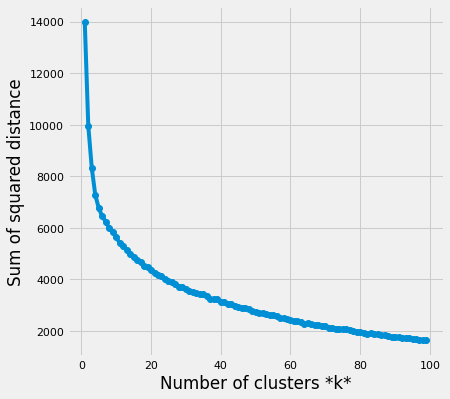

In [773]:
# Elbow plot
# We make a plot between k value and inertia
sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

In [774]:
df.head()

0  1  2  3  4  5  6  7  8  9  ...  19  20  21  22  23  24  25  26  27  cluster
0  0  0  0  0  0  0  0  0  0  0  ...   4   2   0   4   1   0   3   0   0        1
1  1  2  2  2  0  1  0  0  0  1  ...  29  10   0  14  13   4   2   4   1        6
2  0  2  1  0  0  2  0  0  0  0  ...  15   7   0   8   3   8   3   0   0        6
3  0  0  1  0  0  0  0  1  0  0  ...   1   0   0   3   3   1   0   1   2        1
4  0  0  0  0  0  0  0  0  0  0  ...   3   0   0   2   1   0   2   0   0        1

[5 rows x 29 columns]

In [775]:
df.cluster.value_counts()

1    271
6     94
9     51
3     31
4     26
0     11
7     11
8      2
2      1
5      1
Name: cluster, dtype: int64

##**WORDCLOUD OF EACH CLUSTERS.**

In [776]:
import numpy as np
clus_uniq=df_new.cluster.unique()
clus_uniq = np.sort(clus_uniq)

In [777]:
clus_uniq
df_new.head(1)

Id  ... cluster
0   0  ...       1

[1 rows x 3 columns]

0


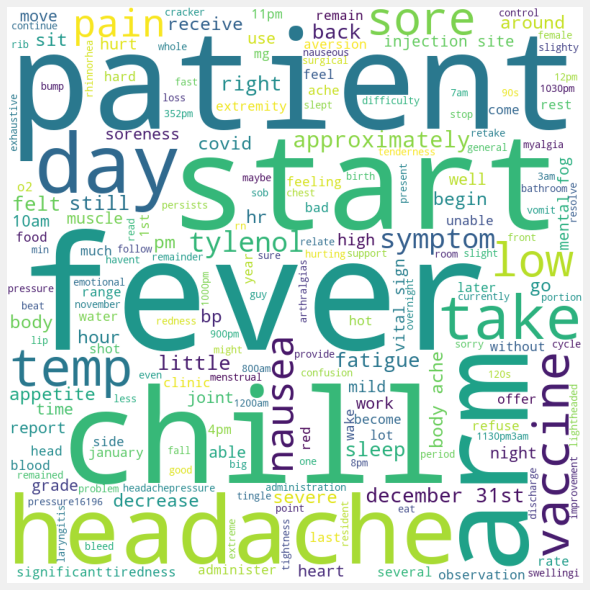

1


<Figure size 432x288 with 0 Axes>

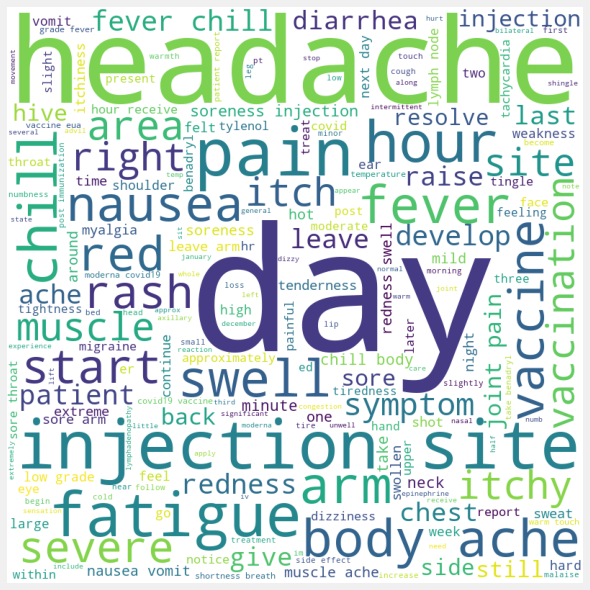

2


<Figure size 432x288 with 0 Axes>

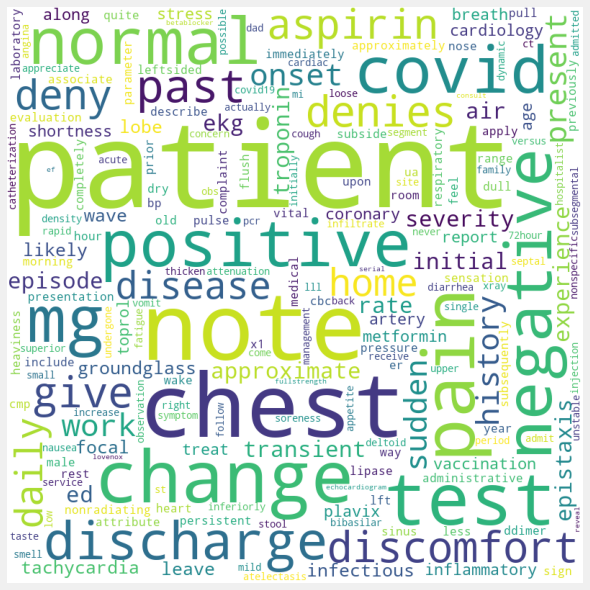

3


<Figure size 432x288 with 0 Axes>

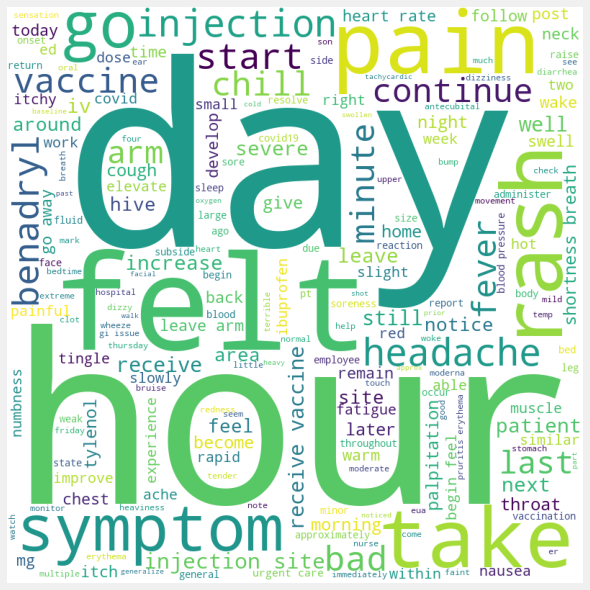

4


<Figure size 432x288 with 0 Axes>

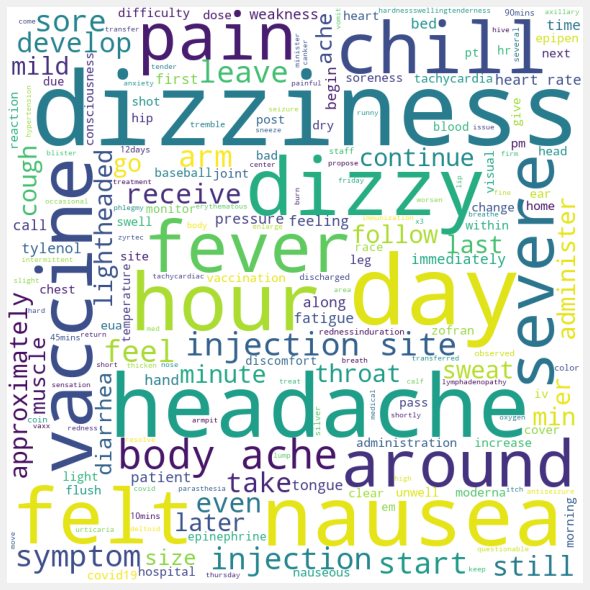

5


<Figure size 432x288 with 0 Axes>

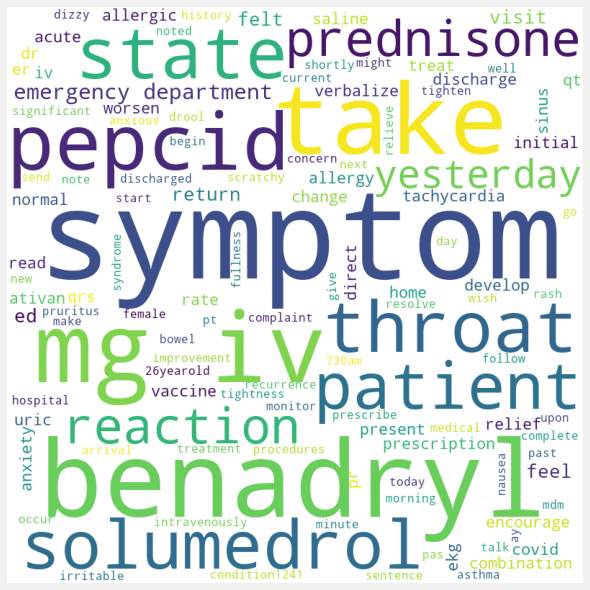

6


<Figure size 432x288 with 0 Axes>

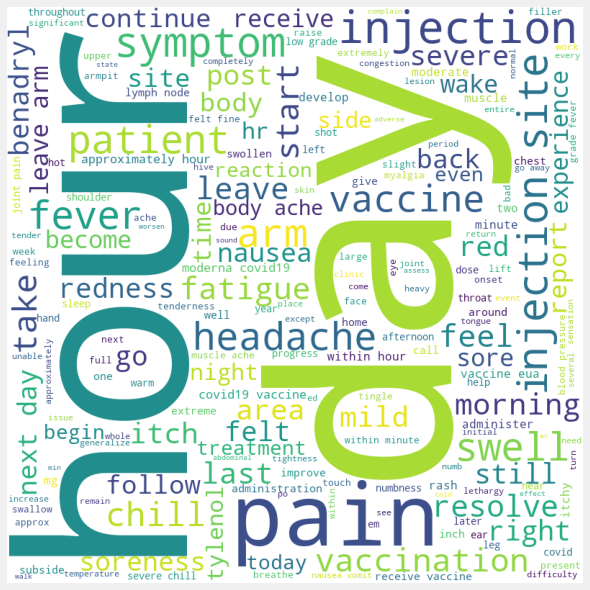

7


<Figure size 432x288 with 0 Axes>

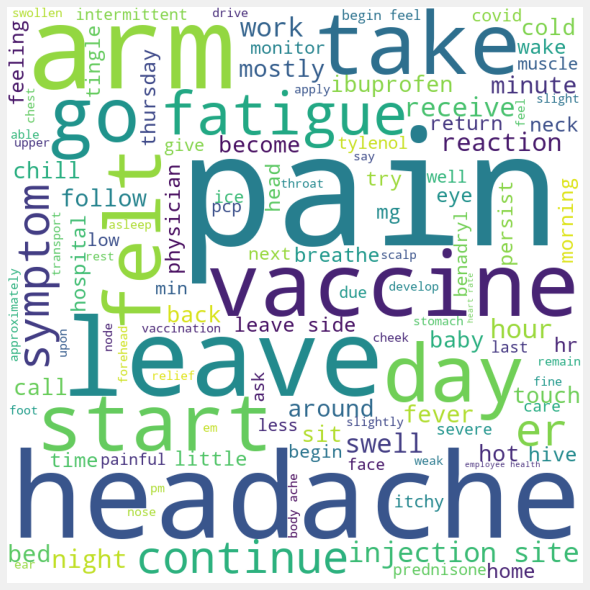

8


<Figure size 432x288 with 0 Axes>

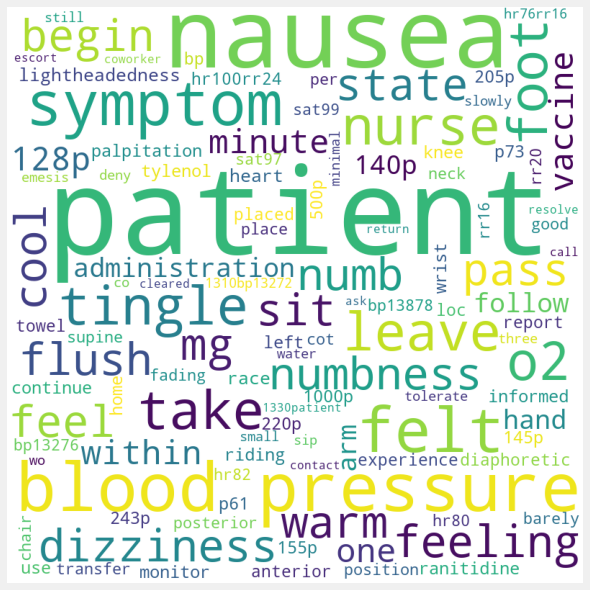

9


<Figure size 432x288 with 0 Axes>

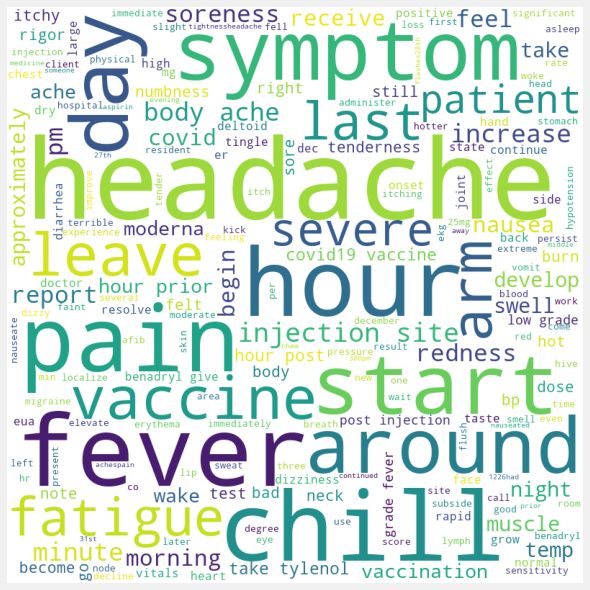

<Figure size 432x288 with 0 Axes>

In [778]:
from wordcloud import WordCloud
for i in range(0,max(clus_uniq)+1):
    # all_words = ' '.join([a for a in df_new.loc[df_new.cluster == i,'Processed']])
    all_words = ' '.join([a for a in df_new.loc[df_new.cluster == i,'Processed']])
    word_cloud_df = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(all_words)
    print(i)                
                    
    #plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(word_cloud_df) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    plt.clf()

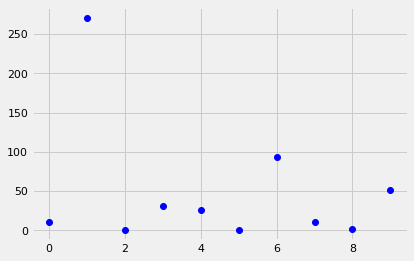

In [781]:
a=df_new.cluster.value_counts()
plt.plot(a,'bo')

#**TO DOWNLOAD EACH CLUSTERS INTO SEPARATE FILES.**

In [675]:
# # Saving the file by different clusters that my model predicted.
# clusters=df_new.groupby('cluster')

# for cluster in clusters.groups:
#   f=open('cluster'+str(cluster)+'.csv','w')
#   data=clusters.get_group(cluster)
#   f.write(data.to_csv())
#   f.close()